Importamos librerías

In [1]:
#Instalar e importar librerías
!pip install SimpleITK

import numpy as np
import matplotlib.pyplot as plt
!pip install SimpleITK
from scipy import signal
#!pip install opencv-python
import SimpleITK as sitk
import cv2
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 7.6 MB/s eta 0:00:00
Mounted at /content/drive


Específicamos la ubicación de la carteta sobre la que trabajaremos

In [35]:
path = '/content/drive/MyDrive/Biohackers'

## Probamos abrir un archivo .tfrecords

In [3]:
ruta_tfrecord = f'{path}/Hackaton/training10_0/training10_0.tfrecords'
ruta2 = f'{path}/Hackaton/training10_1/training10_1.tfrecords'

In [4]:
# Función para leer y parsear el archivo TFRecord
def parse_tfrecord(example_proto):
    feature_description = {
        'label': tf.io.FixedLenFeature([], tf.int64),
        'label_normal': tf.io.FixedLenFeature([], tf.int64),
        'image': tf.io.FixedLenFeature([], tf.string)
    }
    parsed_features = tf.io.parse_single_example(example_proto, feature_description)
    label = parsed_features['label']
    image = tf.io.decode_raw(parsed_features['image'], tf.uint8)
    image = tf.reshape(image, [299, 299, 1])  # Ajusta la forma según tus necesidades
    return image, label

# Crear un dataset a partir del archivo TFRecord
dataset = tf.data.TFRecordDataset(ruta_tfrecord)
dataset = dataset.map(parse_tfrecord)
num = dataset.reduce(0, lambda x, _: x + 1).numpy()

# Convertir el dataset en un array NumPy para su visualización
data_tfrecord = [(image.numpy(), label.numpy()) for image, label in dataset.take(num)]
print(len(data_tfrecord))


11177


In [ ]:
plt.figure(figsize=(10, 10))
num_imagenes = min(5, len(data_tfrecord))  # Mostrar como máximo 5 imágenes
for i in range(num_imagenes):
    image, label = data_tfrecord[i]
    plt.subplot(1, num_imagenes, i + 1)
    plt.imshow(image[:,:,0], cmap='gray')  # Mostrar solo un canal si es una imagen en escala de grises
    plt.axis('off')
    plt.title(f'Imagen {i+1}, Label: {label}')
plt.show()

In [86]:
# Contar el número de elementos en el dataset
num_imagenes = dataset.reduce(0, lambda x, _: x + 1).numpy()

print("Número total de imágenes en el dataset:", num_imagenes)

Número total de imágenes en el dataset: 11177


In [5]:
imagenes = []
labels = []
for i in range(len(data_tfrecord)):
  image, label = data_tfrecord[i]
  imagenes.append(image)
  labels.append(label)

In [ ]:
imagenes[0]

In [6]:
mm = 0 #masa maligna
cm = 0 #calcificacion maligna
mb = 0 #masa benigna
cb = 0 #calcificacion benigna
n = 0 #normal
for i in range(len(labels)):
  if(labels[i] == 0): n+=1
  elif(labels[i] == 1): cb+=1
  elif(labels[i]== 2): mb+=1
  elif(labels[i]== 3): cm+=1
  else: mm+=1

In [7]:
cant_labels = [n, cb, mb, cm, mm]

In [10]:
cant_labels

[9698, 442, 380, 296, 361]

### Dataset training10_1

In [8]:
dataset = tf.data.TFRecordDataset(ruta2)
dataset = dataset.map(parse_tfrecord)
# Obtener la longitud del dataset
num_elementos = dataset.reduce(0, lambda x, _: x + 1).numpy()
print(num_elementos)
# Convertir el dataset en un array NumPy para su visualización
data_tfrecord1 = [(image.numpy(), label.numpy()) for image, label in dataset.take(num_elementos)]

print(len(data_tfrecord1))


11177
11177


In [9]:
imagenes1 = []
labels1 = []
for i in range(len(data_tfrecord1)):
  image, label = data_tfrecord1[i]
  imagenes1.append(image)
  labels1.append(label)

In [10]:
mm = 0 #masa maligna
cm = 0 #calcificacion maligna
mb = 0 #masa benigna
cb = 0 #calcificacion benigna
n = 0 #normal
for i in range(len(labels1)):
  if(labels1[i] == 0): n+=1
  elif(labels1[i] == 1): cb+=1
  elif(labels1[i]== 2): mb+=1
  elif(labels1[i]== 3): cm+=1
  else: mm+=1

In [11]:
cant_labels1 = [n, cb, mb, cm, mm]

In [83]:
cant_labels1

[9751, 424, 346, 287, 369]

In [12]:
for i in range(len(labels1)):
  if (labels1[i]!=0):
    imagenes.append(imagenes1[i])
    labels.append(labels1[i])

In [94]:
len(imagenes)

12603

### Dataset training10_2

In [13]:
ruta3 =  f'{path}/Hackaton/training10_2/training10_2.tfrecords'

In [14]:
dataset = tf.data.TFRecordDataset(ruta3)
dataset = dataset.map(parse_tfrecord)
# Obtener la longitud del dataset
num_elementos = dataset.reduce(0, lambda x, _: x + 1).numpy()
# Convertir el dataset en un array NumPy para su visualización
data_tfrecord3 = [(image.numpy(), label.numpy()) for image, label in dataset.take(num_elementos)]

In [15]:
imagenes3 = []
labels3 = []
for i in range(len(data_tfrecord3)):
  image, label = data_tfrecord3[i]
  imagenes3.append(image)
  labels3.append(label)

In [16]:
mm = 0 #masa maligna
cm = 0 #calcificacion maligna
mb = 0 #masa benigna
cb = 0 #calcificacion benigna
n = 0 #normal
for i in range(len(labels3)):
  if(labels3[i] == 0): n+=1
  elif(labels3[i] == 1): cb+=1
  elif(labels3[i]== 2): mb+=1
  elif(labels3[i]== 3): cm+=1
  else: mm+=1

In [17]:
cant_labels3 = [n, cb, mb, cm, mm]

In [103]:
cant_labels3

[9748, 405, 373, 310, 341]

In [18]:
for i in range(len(labels3)):
  if (labels3[i]!=0):
    imagenes.append(imagenes3[i])
    labels.append(labels3[i])

In [105]:
len(imagenes)

14032

In [19]:
mm = 0 #masa maligna
cm = 0 #calcificacion maligna
mb = 0 #masa benigna
cb = 0 #calcificacion benigna
n = 0 #normal
for i in range(len(labels)):
  if(labels[i] == 0): n+=1
  elif(labels[i] == 1): cb+=1
  elif(labels[i]== 2): mb+=1
  elif(labels[i]== 3): cm+=1
  else: mm+=1
print(n, cb, mb, cm, mm)

9698 1271 1099 893 1071


### Dataset training10_3

In [20]:
ruta4 =  f'{path}/Hackaton/training10_3/training10_3.tfrecords'

In [21]:
dataset = tf.data.TFRecordDataset(ruta4)
dataset = dataset.map(parse_tfrecord)
# Obtener la longitud del dataset
num_elementos = dataset.reduce(0, lambda x, _: x + 1).numpy()
print(num_elementos)
# Convertir el dataset en un array NumPy para su visualización
data_tfrecord4 = [(image.numpy(), label.numpy()) for image, label in dataset.take(num_elementos)]

11177


In [22]:
imagenes4 = []
labels4 = []
for i in range(len(data_tfrecord4)):
  image, label = data_tfrecord4[i]
  imagenes4.append(image)
  labels4.append(label)

In [23]:
mm = 0 #masa maligna
cm = 0 #calcificacion maligna
mb = 0 #masa benigna
cb = 0 #calcificacion benigna
n = 0 #normal
for i in range(len(labels4)):
  if(labels4[i] == 0): n+=1
  elif(labels4[i] == 1): cb+=1
  elif(labels4[i]== 2): mb+=1
  elif(labels4[i]== 3): cm+=1
  else: mm+=1

In [24]:
cant_labels4 = [n, cb, mb, cm, mm]

In [30]:
cant_labels4

[9666, 443, 410, 278, 380]

In [25]:
for i in range(len(labels4)):
  if (labels4[i]==3):
    imagenes.append(imagenes4[i])
    labels.append(labels4[i])

In [119]:
len(imagenes)

14310

In [26]:
mm = 0 #masa maligna
cm = 0 #calcificacion maligna
mb = 0 #masa benigna
cb = 0 #calcificacion benigna
n = 0 #normal
for i in range(len(labels)):
  if(labels[i] == 0): n+=1
  elif(labels[i] == 1): cb+=1
  elif(labels[i]== 2): mb+=1
  elif(labels[i]== 3): cm+=1
  else: mm+=1
print(n, cb, mb, cm, mm)

9698 1271 1099 1171 1071


## Selección de 250 imágenes de Normal y Anormal

---



In [37]:
# Número de imágenes que deseas seleccionar de cada clase
num_imagenes_por_clase = 250

# Inicializar listas para almacenar las imágenes seleccionadas y las etiquetas correspondientes
n = []
mm = []
# Iterar sobre cada clase
for i in range(len(imagenes)):
  if(labels[i] == 0): n.append(imagenes[i])
  elif(labels[i] == 4): mm.append(imagenes[i])


# Convertir las listas a arrays NumPy
imagenes_bin = np.array(n[:num_imagenes_por_clase]+
                                  mm[:num_imagenes_por_clase])
etiquetas_bin = np.array([0]*num_imagenes_por_clase+
                                   [4]*num_imagenes_por_clase)

# Verificar la longitud de las listas seleccionadas
print("Número total de imágenes seleccionadas:", len(imagenes_bin))
print("Número total de etiquetas seleccionadas:", len(etiquetas_bin))


Número total de imágenes seleccionadas: 500
Número total de etiquetas seleccionadas: 500


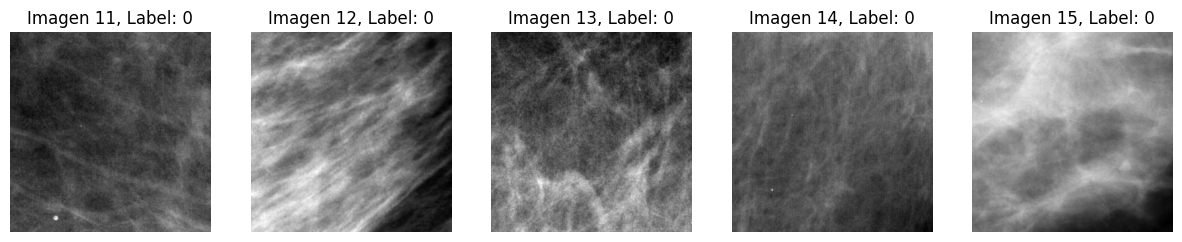

In [43]:
plt.figure(figsize=(15, 15))

num_imagenes = 5
n = 10
for i in range(num_imagenes):
    image, label = imagenes_bin[i+n], etiquetas_bin[i+n]
    plt.subplot(1, num_imagenes, i + 1)
    plt.imshow(image[:,:,0], cmap='gray')  # Mostrar solo un canal si es una imagen en escala de grises
    plt.axis('off')
    plt.title(f'Imagen {i+n+1}, Label: {label}')
plt.show()

In [49]:
data_bin = []
for i in range(len(imagenes_bin)):
  data_bin.append({
      'imagen': imagenes_bin[i],
      'clase': etiquetas_bin[i]
  })

In [50]:
import random
random.shuffle(data_bin)

In [51]:
len(data_bin)

500

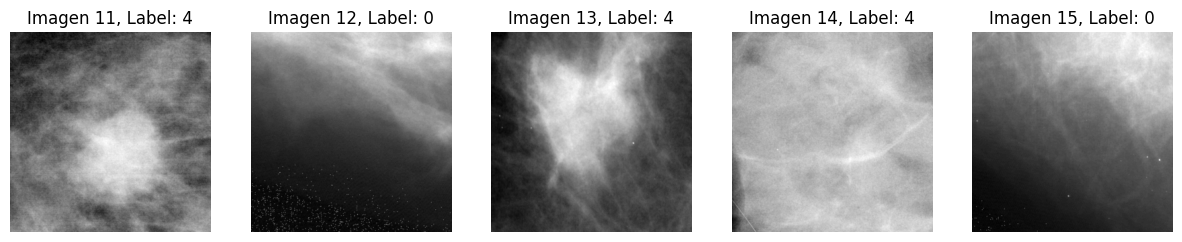

In [52]:
plt.figure(figsize=(15, 15))

num_imagenes = 5
n = 10
for i in range(num_imagenes):
    image, label = data_bin[i]['imagen'], data_bin[i]['clase']
    plt.subplot(1, num_imagenes, i + 1)
    plt.imshow(image[:,:,0], cmap='gray')  # Mostrar solo un canal si es una imagen en escala de grises
    plt.axis('off')
    plt.title(f'Imagen {i+n+1}, Label: {label}')
plt.show()

In [53]:
import numpy as np

# Obtén el número total de imágenes
num_images = len(data_bin)

# Define la proporción para cada conjunto
train_ratio = 0.8  # 80% para entrenamiento
val_ratio = 0.1    # 10% para validación
test_ratio = 0.1   # 10% para prueba

# Calcula el tamaño de cada conjunto
num_train = int(train_ratio * num_images)
num_val = int(val_ratio * num_images)
num_test = int(test_ratio * num_images)

# Mezcla aleatoriamente los datos
np.random.shuffle(data_bin)

# Divide los datos en conjuntos de entrenamiento, validación y prueba
train_data_bin = data_bin[:num_train]
val_data_bin = data_bin[num_train:num_train+num_val]
test_data_bin = data_bin[num_train+num_val:]

# Verifica que las divisiones sean correctas
print("Número de imágenes en el conjunto de entrenamiento:", len(train_data_bin))
print("Número de imágenes en el conjunto de validación:", len(val_data_bin))
print("Número de imágenes en el conjunto de prueba:", len(test_data_bin))


Número de imágenes en el conjunto de entrenamiento: 400
Número de imágenes en el conjunto de validación: 50
Número de imágenes en el conjunto de prueba: 50


In [54]:
# Inicializa listas para almacenar las imágenes y las etiquetas de entrenamiento
train_images_bin = []
train_labels_bin = []

# Extrae las imágenes y etiquetas de cada elemento del conjunto de entrenamiento
for item in train_data_bin:
    image = item['imagen']
    label = item['clase']
    train_images_bin.append(image)
    train_labels_bin.append(label)

# Convierte las listas en arrays numpy si es necesario
train_images_bin = np.array(train_images_bin)
train_labels_bin = np.array(train_labels_bin)

# Inicializa listas para almacenar las imágenes y las etiquetas de entrenamiento
val_images_bin = []
val_labels_bin = []

# Extrae las imágenes y etiquetas de cada elemento del conjunto de entrenamiento
for item in val_data_bin:
    image = item['imagen']
    label = item['clase']
    val_images_bin.append(image)
    val_labels_bin.append(label)

# Convierte las listas en arrays numpy si es necesario
val_images_bin = np.array(val_images_bin)
val_labels_bin = np.array(val_labels_bin)

# Inicializa listas para almacenar las imágenes y las etiquetas de entrenamiento
test_images_bin = []
test_labels_bin = []

# Extrae las imágenes y etiquetas de cada elemento del conjunto de entrenamiento
for item in test_data_bin:
    image = item['imagen']
    label = item['clase']
    test_images_bin.append(image)
    test_labels_bin.append(label)

# Convierte las listas en arrays numpy si es necesario
test_images_bin = np.array(test_images_bin)
test_labels_bin = np.array(test_labels_bin)


In [55]:
import numpy as np

# Guardar los arrays numpy en archivos binarios
np.save(f'{path}/Hackaton/Dataset Binario/training_set_bin/train_images_bin.npy', train_images_bin)
np.save(f'{path}/Hackaton/Dataset Binario/training_set_bin/train_labels_bin.npy', train_labels_bin)
np.save(f'{path}/Hackaton/Dataset Binario/val_set_bin/val_images_bin.npy', val_images_bin)
np.save(f'{path}/Hackaton/Dataset Binario/val_set_bin/val_labels_bin.npy', val_labels_bin)
np.save(f'{path}/Hackaton/Dataset Binario/test_set_bin/test_images_bin.npy', test_images_bin)
np.save(f'{path}/Hackaton/Dataset Binario/test_set_bin/test_labels_bin.npy', test_labels_bin)